<a href="https://colab.research.google.com/github/Quzzal-Khanam/ArchTech_Mnist_digit_recognition/blob/main/Handwritten_Digit_Recognition_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import kagglehub for downloading competition data
import kagglehub
kagglehub.login()  # Authenticate Kaggle API

In [ ]:
# Upgrade kagglehub if needed to avoid compatibility issues
!pip install --upgrade kagglehub

In [ ]:
# Download the digit recognizer dataset from Kaggle
digit_recognizer_path = kagglehub.competition_download('digit-recognizer')
print('Data source import complete.')



100%|██████████| 15.3M/15.3M [00:00<00:00, 150MB/s]

Extracting files...


Data source import complete.


<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>1 | Introduction 🎯</b></h2>
<h3 style="color:red"><B>✅ Competition Description</b></h3>

* In this competition, our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

<h3 style="color:red"><b>✅ Data Description</b></h3>

* The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

* The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

* Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

<h3 style="color:red"><b>✅ Model choice</b></h3>

In this kernel, I have created a model based on Deep Learning : <span style="color:green"><b>Convolutional Neural Network (CNN)</b></span> to recognize different handwritten digits and classify them. The dataset used here is actually from Digit Recognition Competition. Let's get started.

<center><img src="https://production-media.paperswithcode.com/method_collections/cnn.jpeg" style='border-radius:30px'>

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>2 | Import Necessary Librairies 📚</b></h2>

In [ ]:
# Install colorama
!pip install colorama

# Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore  # Colorama for colored text output
from tensorflow.keras.utils import to_categorical  # Corrected import for to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Print the files in the Kaggle input directory (this part works in Kaggle, not in Colab)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>3 | Data Loading and Overview 📅</b></h2>

In [ ]:
import kagglehub
import pandas as pd
import os

# Assuming 'digit_recognizer' is the name or ID of the downloaded dataset
digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

# Construct the file paths manually using os.path.join
train_file_path = os.path.join(digit_recognizer_path, 'train.csv')
test_file_path = os.path.join(digit_recognizer_path, 'test.csv')

# Now, you can read the CSV files using the correct paths
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Display shape (rows, columns) of datasets
print(Fore.BLUE +f"The train set has",Fore.GREEN+f"{train_df.shape[0]}",Fore.BLUE +"rows and",Fore.GREEN+f"{train_df.shape[1]}",Fore.BLUE +"columns")
print(Fore.BLUE +f"The test set has",Fore.GREEN+f"{test_df.shape[0]}",Fore.BLUE +"rows and",Fore.GREEN+f"{test_df.shape[1]}",Fore.BLUE +"columns")

The train set has 42000 rows and 785 columns
The test set has 28000 rows and 784 columns


In [ ]:
# Display shape (rows, columns) of datasets
train_na=train_df.isna().sum().sum()
test_na=test_df.isna().sum().sum()
print(Fore.BLUE +f"The number of missing values in train set is :", Fore.GREEN+f"{train_na}")
print(Fore.BLUE +f"The number of missing values in test set is :", Fore.GREEN+f"{test_na}")

The number of missing values in train set is : 0
The number of missing values in test set is : 0


<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>4 | Visualization of the target variable 👁‍🗨👀</b></h2>

In [ ]:
# Separate features and label
X = train_df.drop("label", axis=1)
Y=train_df["label"]

In [ ]:
Y.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


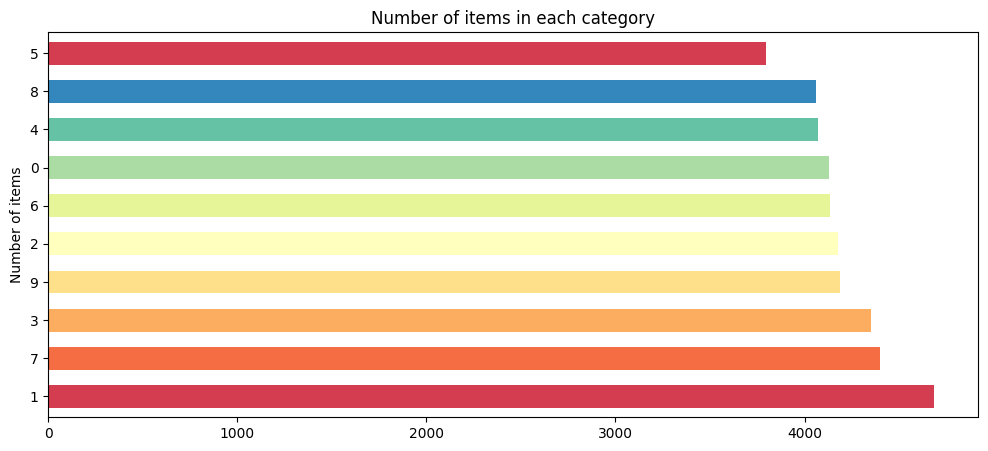

In [ ]:
# Show count of each digit (0-9)
result=Y.value_counts().sort_values(ascending=False)
result.plot.barh(color=sns.color_palette("Spectral", 9),width = 0.6, figsize=(12,5))
plt.title("Number of items in each category")
plt.ylabel('Number of items')
plt.show()

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>5 | Visualization of the features variables 📈📊</b></h2>

In [ ]:
# Reshape data from (784,) to (28, 28, 1) for CNN input
X = X.values.reshape(-1,28,28,1)
X_test = test_df.values.reshape(-1,28,28,1)
# Show shape for confirmation
X.shape, X.shape

((42000, 28, 28, 1), (42000, 28, 28, 1))

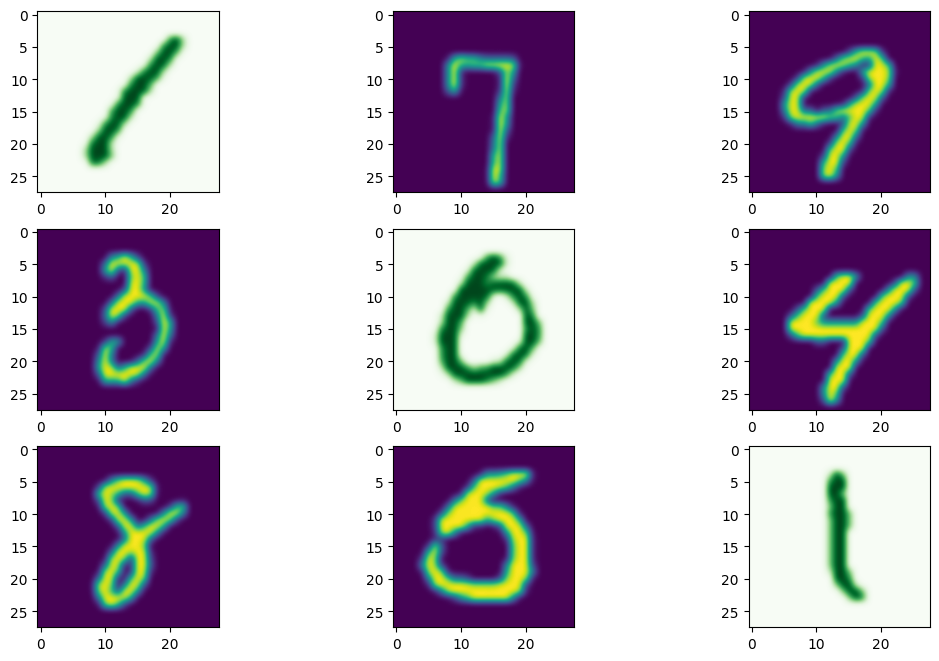

In [ ]:
# Display sample digit images in a grid
fig, ax = plt.subplots(3, 3, figsize=(13, 8))
ax[0,0].imshow(X[0], cmap = 'Greens', interpolation='bicubic')
ax[0,1].imshow(X[50], cmap = 'viridis', interpolation='bicubic')
ax[0,2].imshow(X[100], cmap = 'viridis', interpolation='bicubic')
ax[1,0].imshow(X[150], cmap = 'viridis', interpolation='bicubic')
ax[1,1].imshow(X[200], cmap = 'Greens', interpolation='bicubic')
ax[1,2].imshow(X[250], cmap = 'viridis', interpolation='bicubic')
ax[2,0].imshow(X[300], cmap = 'viridis', interpolation='bicubic')
ax[2,1].imshow(X[350], cmap = 'viridis', interpolation='bicubic')
ax[2,2].imshow(X[400], cmap = 'Greens', interpolation='bicubic')

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>6 | Data preprocessing ♻</b></h2>

In [ ]:
# Normalize pixel values (0-255) to (0-1)
X = X/255
X_test = X_test/255

In [ ]:
# One-hot encode labels (0–9) to vectors (e.g., [0,0,1,0,0...])
Y = to_categorical(Y, num_classes = 10)

In [ ]:
# Spliting Data in training and testing set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=42)

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>7 | Building a CNN model ⚔</b></h2>

In [ ]:
# Initialize model
model = models.Sequential()

# 1st Conv Layer: 32 filters of size 3x3 + ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# 1st Pooling Layer: Downsample using MaxPooling
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Conv Layer: 64 filters + ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 2nd Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Conv Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 3rd Pooling Layer (optional)
model.add(layers.MaxPooling2D((2, 2)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())    # Flatten output from 3D to 1D

# Dense layer with 128 neurons + ReLU
model.add(layers.Dense(128, activation='relu'))

# Output layer with 10 neurons (0–9) + Softmax
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,354 (255.29 KB)

 Trainable params: 65,354 (255.29 KB)

 Non-trainable params: 0 (0.00 B)

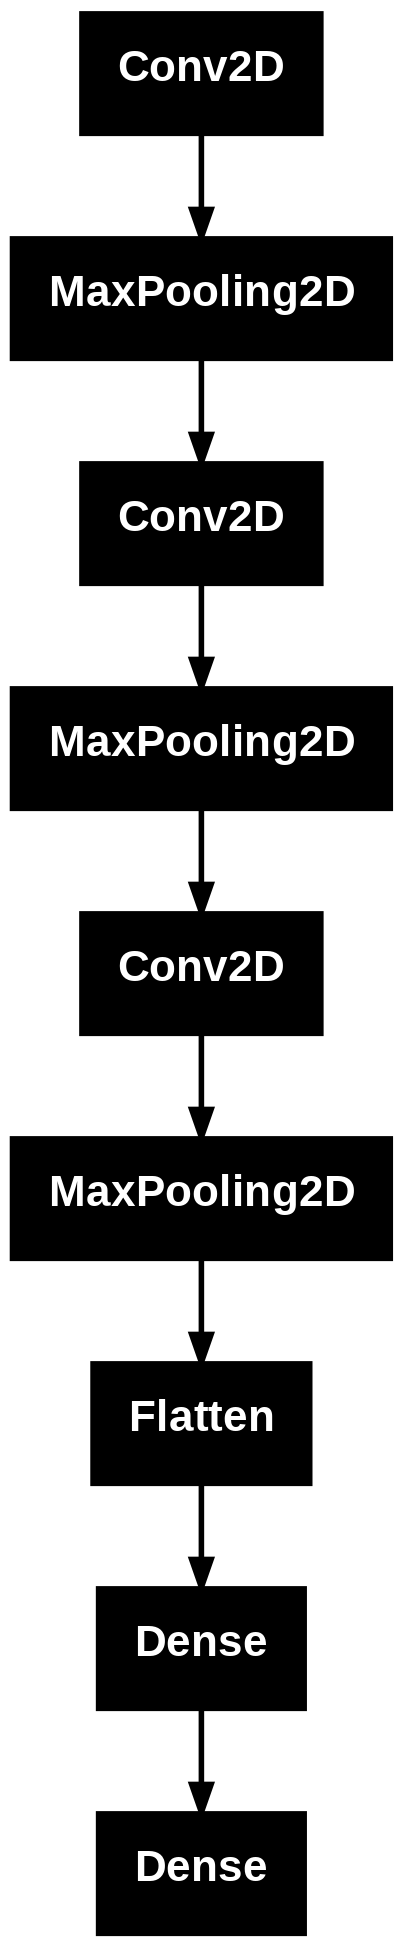

In [ ]:
# Visualization of the model
tf.keras.utils.plot_model(model)

In [ ]:
# Compile the model
# model.add(layers.Flatten()) # Remove this line
# model.add(layers.Dense(128, activation='relu')) # Remove this line
# model.add(layers.Dense(10, activation='softmax')) # Remove this line

# Compile the model with Adam optimizer and categorical loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>8 | Model evaluation & accuracy</b></h2>

In [ ]:
# Train the model and store the training history

# Print shapes and types for debugging
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_val:", Y_val.shape)
print("Type of Y_train:", type(Y_train))
print("Type of Y_val:", type(Y_val))


history = model.fit(X_train, Y_train, epochs=10,
                    validation_data=(X_val, Y_val))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Shape of X_train: (29400, 28, 28, 1)
Shape of Y_train: (29400, 10)
Shape of X_val: (12600, 28, 28, 1)
Shape of Y_val: (12600, 10)
Type of Y_train: <class 'numpy.ndarray'>
Type of Y_val: <class 'numpy.ndarray'>
Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.7765 - loss: 0.6923 - val_accuracy: 0.9378 - val_loss: 0.1896
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9619 - loss: 0.1158 - val_accuracy: 0.9742 - val_loss: 0.0828
Epoch 3/10


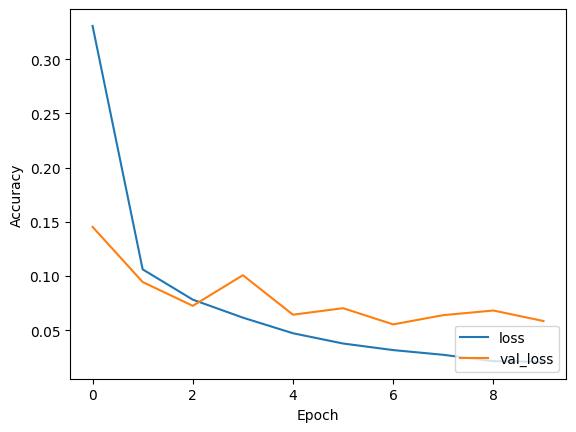

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
# Evaluate performance on training set
train_loss, train_accuracy = model.evaluate(X_train, Y_train)
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

919/919 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9948 - loss: 0.0149
Train loss:  0.012730681337416172
Train accuracy:  0.996122419834137


In [ ]:
# Evaluate on validation set
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9838 - loss: 0.0598
Validation loss:  0.058446064591407776
Validation accuracy:  0.9838095307350159


In [ ]:
model.save("your_model.h5")


<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>9 | Prediction & submission</b></h2>

In [ ]:
# Predict on test data
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step


In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [ ]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from PIL import Image

# Load sample MNIST data
(x_train, y_train), (_, _) = mnist.load_data()

def get_sample_image(digit):
    digit = int(digit)

    # Pick the first image of the given digit from training data
    for i in range(len(y_train)):
        if y_train[i] == digit:
            img = x_train[i]
            break

    # Convert to PIL Image
    pil_img = Image.fromarray(img).resize((100, 100))
    return pil_img

interface = gr.Interface(
    fn=get_sample_image,
    inputs=gr.Number(label="Enter a digit (0-9)", precision=0),
    outputs=gr.Image(label="Handwritten Digit Example"),
    title="🧠 Show Digit as Image",
    description="Enter a number (0-9) and see a real handwritten digit from the dataset."
)

interface.launch(share=True)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1cad2bb5d6a0c0b89f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
print(f"Validation Accuracy: {model.evaluate(X_val, Y_val, verbose=0)[1] * 100:.2f}%")


Validation Accuracy: 98.38%


| Step                              | Done in Code? | Notes                                                               |
| --------------------------------- | ------------- | ------------------------------------------------------------------- |
| Import Libraries                  | ✅             | All key libraries imported                                          |
| Connect to GDrive/Kaggle          | ✅             | Used `kagglehub`                                                    |
| Load Dataset                      | ✅             | Used `pd.read_csv()`                                                |
| Explore Data (`head`, `describe`) | ✅             | Used `.head()` and shape; `.describe()` can also be added           |
| Train-test split                  | ✅             | Used `train_test_split`                                             |
| Normalization                     | ✅             | Rescaled images from 0-255 to 0-1                                   |
| Apply ML Technique                | ✅             | CNN with multiple Conv2D layers                                     |
| Model Fit                         | ✅             | Fit using `model.fit()`                                             |
| Predict                           | ✅             | Done using `model.predict()`                                        |
| Compare                           | ✅ (partial)   | Evaluated using `.evaluate()` instead of real test label comparison |
